** Introduction **

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
Questions For Investigation
<!---
@online{Udacity:P1:Stroop,
  author = {Udacity},
  title  = {Statistics: The Science of Decisions - Project Instructions},
  date   = {2015},
  url    = {https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub}
}
-->

<!--bibtex


-->

Examples of citations: <a name="ref-1"/>[(UNDEFINED)](#cite-UDA:2015).

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

# What is our independent variable? What is our dependent variable?

The independent variable is a binary condition that of either congruency or incongruency between the color of a word, and the symantic meaning of the word.  As example the word <font color='red'>'RED'</font> is a congruent example where the word 'red' has the color of its symantic meaning, i.e. the color it represents, and <font color='green'>'BLUE'</font> is an incongruent case where the word 'blue' which has the symantic meaning of the color blue is instead the color green.  Frome here on out the terms congruent color selection, CCS, and incongruent color selection, ICS, will be used to denote the two conditions the dependent variable may take that of a word representing a color being colored with or with a different color respectively.

The dependent variable is the time, in seconds, it takes to read through an equal sized lists of CCS or ICS words.

# What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The null hypothesis, $H_0$ is the statement that the ICS task will take less or an equal amount of time to the CCS task.  The alternative hypothesis, $H_A$ is the statement that the mean population time to read an ICS list will be greater than an equally sized CCS list. The null and alternative hypothesis choice stems from a need to test quantatively the validity and extent of an already well respected phenomenon the Stroop effect.  The Stroop effect being defined to mean that cognitive incongruences will lead to an increase in the reaction time of a task.  
    It is true that this single tailed objective may not provide insight if indeed the reaction time for ICS word lists take, on the average, less time to complete, however this is a test regarding the scope and veracity of the Stroop effect which has been shown in many previous quantative tests to have general validity.  If indeed the ICS task takes less time it is enough that $H_0$ should be kept to cause doubt regarding the validity of either the test or the Stroop effect.  That is due to the large body of work already done to test the effect if $H_0$ is kept there is either something wrong with the experiment or the Stroop effect has either more limitations on generalizability than expected or there are indeed real issues with it's veracity.  So to sum things up via a set of equations: 
    
\begin{align}
H_0:\; \mu_{ICS} &&\le&& \mu_{CCS} \\
H_A:\; \mu_{ICS} &&>&& \mu_{CCS}
\end{align}

# Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Below I've printed the mean, sample standard deviation, minimum values, 25th, 50th, 75th percentiles, maximums, and the median for both the CCS and ICS samples, all values are in seconds.  For central tendency I've included both the mean, and the median - which in this case is simply the 50th percentile.  Notice the fact that for both CCS and ICS the median and mean are nearly identical, for the CCS case it's less than one third of a second difference, and for the ICS case the difference between these two measure of central tendency is only slightly greater than a second.  This points to both distribution being evenly distributed around the mean.  As we can see for nearly all percentiles, minimum and maximum, and mean values the CCS times are roughly two thirds of the value of the ICS times, and all times for every category are significantly longer for the ICS sample relative to the CCS. 
    
An indication of the relative spread can be observed by looking at the sample standard deviations.  the ICS case is slightly more spread out than the CCS case $4.797s$ to $3.559s$ respectively, i.e slightly over a second more for the ICS sample.  To gain a better descriptive understanding of the spread we can also look at the range, i.e. $R = x_{max} - x_{min}$ of the two samples:
\begin{align}
R_{CCS} &= 22.328000 - 8.630000 & = 13.698\\
R_{ICS} &= 35.255000 - 15.687000 & = 19.568
\end{align}
From both the sample standard deviation and the range we can see that the spread of the ICS sample is greater both in terms of the range, i.e. outliers, and of the sample standard deviation:

In [2]:
import pandas as pd
import numpy as np
stroopdata = pd.read_csv('stroopdata.csv')
stroopdata.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


and a simple calculation of the range for the CCS and ICS samples:

In [3]:
print("\nThe range for the two cases:\n", stroopdata.max() - stroopdata.min())


The range for the two cases:
 Congruent      13.698
Incongruent    19.568
dtype: float64


# Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


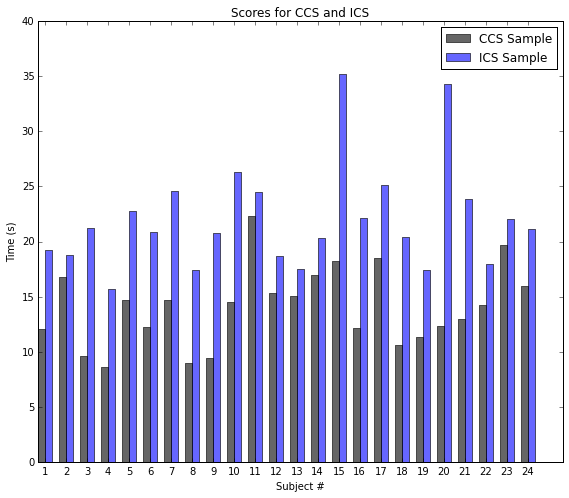

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (8.0, 7.0)

fig, ax = plt.subplots()

index = np.arange(stroopdata.shape[0])
bar_width = 0.35

opacity = 0.6

rects1 = plt.bar(index, stroopdata['Congruent'], 
                 bar_width,
                 alpha=opacity,
                 color='k',
                 label='CCS Sample')

rects2 = plt.bar(index + bar_width, stroopdata['Incongruent'], 
                 bar_width,
                 alpha=opacity,
                 color='b',
                 label='ICS Sample')

# add some text for labels, title and axes ticks
plt.xlabel('Subject #')
plt.ylabel('Time (s)')
plt.title('Scores for CCS and ICS')
plt.xticks(index + bar_width, range(1,25))
plt.legend()

plt.tight_layout()
plt.show()

The bar graph above shows graphically that each subject took more time on the ICS word list than on the CCS word list.

# Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

# What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

#### Refrences:

http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table # link for reading in CSV file

https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub # Udacity official document on general instructions for further projects as well as specifically for the Stroop Effect, P1.

https://docs.google.com/document/d/1bqyi1Fm5truesLhmbAq16Zl-Ajj9bnNIU_68P60nDQg/pub # Udacity official documentation outlining what is expected to satisfactorily complete a project

http://matplotlib.org/examples/api/barchart_demo.html # The bar graph example was used as a basis for the bar graph in this report.

http://matplotlib.org/api/colors_api.html # understanding colors in matplotlib

In [7]:
%%bash
ipython3 nbconvert --template udacity.tplx  --to latex "Stroop Effect.ipynb"
pdflatex "Stroop Effect"
bibtex "Stroop Effect"
pdflatex "Stroop Effect"

This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./Stroop Effect.tex
LaTeX2e <2015/01/01> patch level 2
Babel <3.9m> and hyphenation patterns for 79 languages loaded.
(/home/yigal/.texlive/2015/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/home/yigal/.texlive/2015/texmf-dist/tex/latex/base/size10.clo))
(/home/yigal/.texlive/2015/texmf-dist/tex/latex/graphics/graphicx.sty
(/home/yigal/.texlive/2015/texmf-dist/tex/latex/graphics/keyval.sty)
(/home/yigal/.texlive/2015/texmf-dist/tex/latex/graphics/graphics.sty
(/home/yigal/.texlive/2015/texmf-dist/tex/latex/graphics/trig.sty)
(/home/yigal/.texlive/2015/texmf-dist/tex/latex/latexconfig/graphics.cfg)
(/home/yigal/.texlive/2015/texmf-dist/tex/latex/pdftex-def/pdftex.def
(/home/yigal/.texlive/2015/texmf-dist/tex/generic/oberdiek/infwarerr.sty)
(/home/yigal/.texlive/2015/texmf-dist/tex

/home/yigal/.local/lib/python3.4/site-packages/IPython/nbconvert.py:13: ShimWarning: The `IPython.nbconvert` package has been deprecated. You should import from ipython_nbconvert instead.
  "You should import from ipython_nbconvert instead.", ShimWarning)
[NbConvertApp] Converting notebook Stroop Effect.ipynb to latex
[NbConvertApp] Writing 43971 bytes to Stroop Effect.tex


In [ ]:
%ls

In [ ]:
#from notebook.nbextensions import install_nbextension
#install_nbextension('https://goo.gl/5TK96v', user=True, destination="vim_binding.js")
# Or if you prefre a full URL
#install_nbextension('https://rawgithub.com/lambdalisue/jupyter-vim-binding/master/nbextensions/vim_binding.js', user=True)
#Jupyter.utils.load_extensions('vim_binding')

In [8]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});

<IPython.core.display.Javascript object>

<!--bibtex

@Article{Udacity2015,
  Author    = {Udacity, Udacity},
  Title     = {Statistics: The Science of Decisions - Project Instructions},
  year      = 2015,
  url       = "https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub",
  publisher = {Udacity},
}

@online{WinNT,
  author = {MultiMedia LLC},
  title = {{MS Windows NT} Kernel Description},
  year = 1999,
  url = {http://web.archive.org/web/20080207010024/http://www.808multimedia.com/winnt/kernel.htm},
  urldate = {2010-09-30}
}

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->

Examples of citations: <a name="ref-2"/>[(P&eacute;rez and Granger, 2007)](#cite-PER-GRA:2007) or <a name="ref-3"/>[(Papa and Markov, 2007)](#cite-Papa2007) <a name="ref-4"/>[(Udacity, 2015)](#cite-Udacity2015) <a name="ref-5"/>[(, 1999)](#cite-WinNT).

# References

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>P&eacute;rez, Fernando and Granger, Brian E.. 2007. _IPython: a System for Interactive Scientific Computing_. [URL](http://ipython.org)

<a name="cite-Papa2007"/><sup>[^](#ref-3) </sup>Papa, David A. and Markov, Igor L.. 2007. _Hypergraph partitioning and clustering_. [URL](http://www.podload.org/pubs/book/part\_survey.pdf)

<a name="cite-Udacity2015"/><sup>[^](#ref-4) </sup>Udacity, Udacity. 2015. _Statistics: The Science of Decisions - Project Instructions_. [URL](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub)

<a name="cite-WinNT"/><sup>[^](#ref-5) </sup>MultiMedia LLC. 1999. _MS Windows NT Kernel Description_. [URL](http://web.archive.org/web/20080207010024/http://www.808multimedia.com/winnt/kernel.htm)

